In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

file_path = "imdb_movies.csv"
dataFrame = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)

print(dataFrame.head())

dataFrame["date_x"] = pd.to_datetime(dataFrame["date_x"])

                         names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                         

In [3]:
# Czy filmy z większym nakładem przynoszą większy zysk? 

# Sprawdźmy korelację między budżetem a zyskiem
correlation = dataFrame['budget_x'].corr(dataFrame['revenue'])

print(f"Korelacja między budżetem a zyskiem: {correlation}")

Korelacja między budżetem a zyskiem: 0.6738295691763745


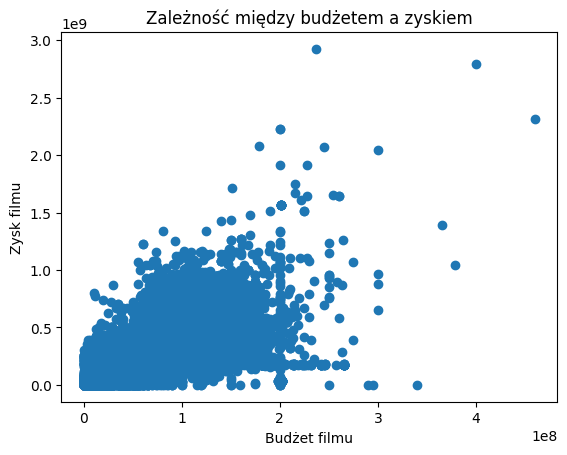

In [29]:
plt.scatter(dataFrame['budget_x'], dataFrame['revenue'])
plt.title('Zależność między budżetem a zyskiem')
plt.xlabel('Budżet filmu')
plt.ylabel('Zysk filmu')
plt.show()

#### Jest pewna korelacja miedzy budżetem a zyskiem. Sprawdźmy jednak czy coś innego może mieć jeszcze wpływ na zysk.

#### 30 pierwszych języków pod względem sumy zysków

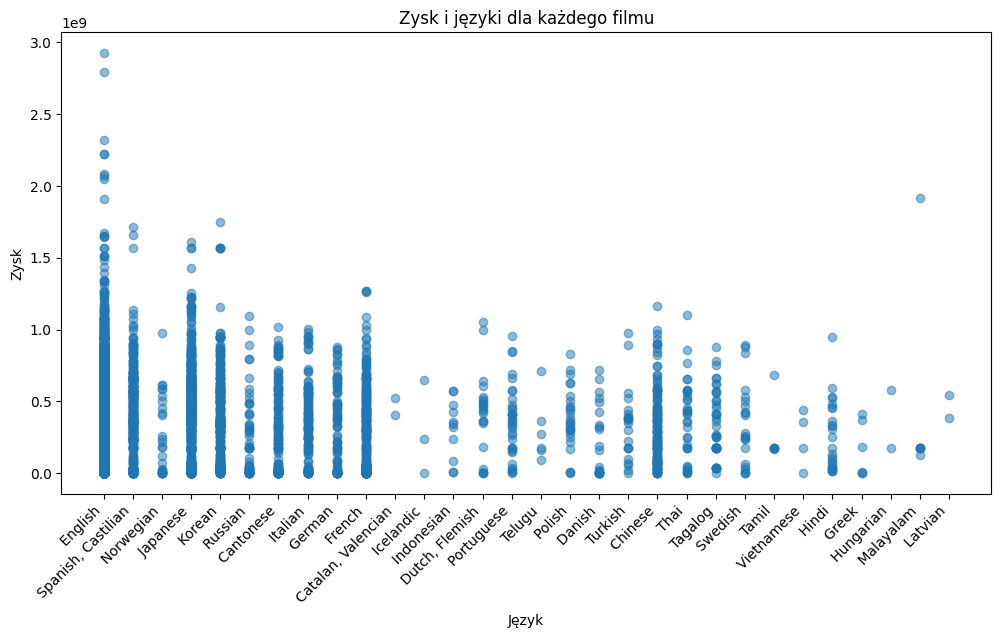

In [187]:
revenueByLanguage = dataFrame.groupby('orig_lang')['revenue'].sum()

sortedRevenueByLanguage = revenueByLanguage.sort_values(ascending=False)
topLanguagesByRevenue = sortedRevenueByLanguage.head(30).index

dataFrameFiltered = dataFrame[dataFrame['orig_lang'].isin(topLanguagesByRevenue)]

plt.figure(figsize=(12, 6))
plt.scatter(dataFrameFiltered['orig_lang'], dataFrameFiltered['revenue'], alpha=0.5)

plt.xlabel('Język')
plt.ylabel('Zysk')
plt.title('Zysk i języki dla każdego filmu')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Tu widzimy że największy sukces mają filmy angielskie, ale to też o niczym nie świadczy po najprawdopodbniej jest ich najwięcej.

In [122]:
languageCounts = dataFrame['orig_lang'].value_counts()
print(languageCounts.head(10))

orig_lang
 English               7417
 Japanese               714
 Spanish, Castilian     397
 Korean                 388
 French                 285
 Chinese                153
 Cantonese              145
 Italian                142
 German                  93
 Russian                 66
Name: count, dtype: int64


#### Potwierdzam moją hipotezę - i idąc dalej tym tropem, skoro jest najwięcej filmów angielskie to też mają większe szanse na odniesienie wielkiego sukcesu. Stąd wynika to że niektóre filmy w tym języku osiągnęły takie zyski.

#### Sprawdźmy sumę przychodów dla języków

orig_lang
 English               1.651533e+12
 Japanese              2.675248e+11
 Spanish, Castilian    1.565417e+11
 Korean                1.306842e+11
 French                7.624916e+10
 Italian               4.783709e+10
 Chinese               4.558107e+10
 Cantonese             4.411445e+10
 German                2.868553e+10
 Tagalog               1.424762e+10
Name: revenue, dtype: float64


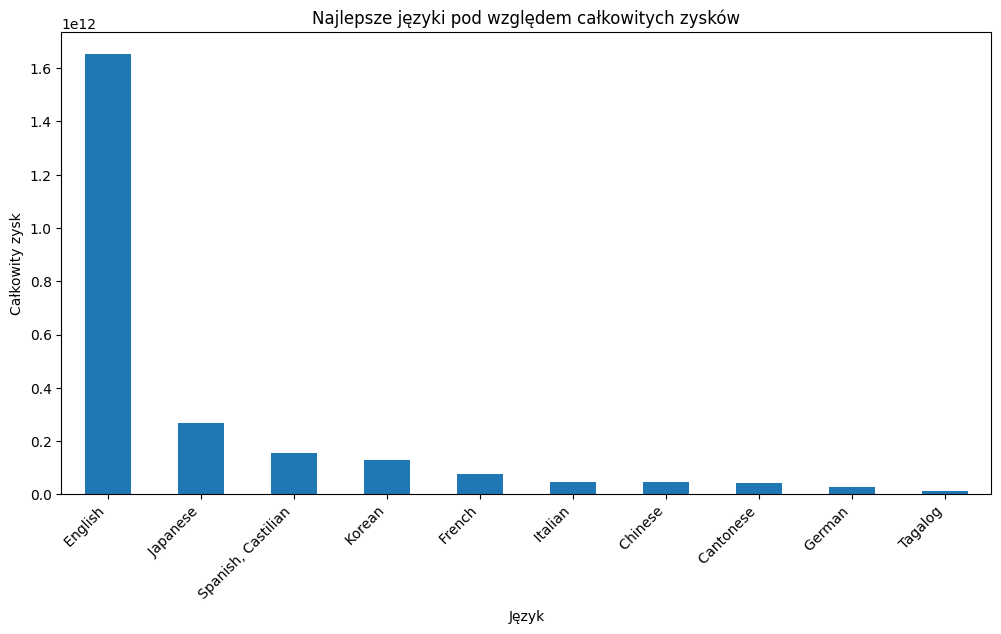

In [127]:
topLanguages = sortedRevenueByLanguage.head(10)
print(topLanguages)

plt.figure(figsize=(12, 6))
topLanguages.plot(kind='bar')

plt.title('Najlepsze języki pod względem całkowitych zysków')
plt.xlabel('Język')
plt.ylabel('Całkowity zysk')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Widzimy tutaj że w sumie język angielski też wygrywa. Sprawdźmy zatem używając testu t studenta czy istnieje istotna róznica między średnimi pierwszych dwóch języków

In [152]:
revenueJapanese = dataFrame[dataFrame['orig_lang'] == ' Japanese']['revenue']
revenueEnglish = dataFrame[dataFrame['orig_lang'] == ' English']['revenue']

tStatistic, pValue = ttest_ind(revenueJapanese, revenueEnglish, equal_var=False)

print(f'Test Statistic: {tStatistic}')
print(f'P-value: {pValue}')

alpha = 0.05
if pValue < alpha:
    print("Odrzucamy hipotezę zerową. Istnieje istotna różnica w średnich przychodach między japońskim a angielskim.")
else:
    print("Nie ma istotnej różnicy w średnich przychodach między japońskim a angielskim.")

Test Statistic: 12.704724686441223
P-value: 7.0358668679091325e-34
Odrzucamy hipotezę zerową. Istnieje istotna różnica w średnich przychodach między japońskim a angielskim.


In [109]:
meanDifference = round(revenueJapanese.mean() - revenueEnglish.mean())
print(f'Średnia różnica zysków między językami: {meanDifference / 1e6} mln')

medianDifference = round(np.median(revenueJapanese) - np.median(revenueEnglish))
print(f'Różnica między medianami zysków: {medianDifference / 1e6} mln')

Średnia różnica zysków między krajami: 114.146377 mln
Różnica między medianami zysków: 187.574124 mln


#### Istnieje różnica, ale co ciekawe to język japoński jest tym który jest wyżej.

#### Sprawdźmy średnie wszystkich języków.

Średnia przychodu dla każdego języka:
orig_lang
 Dzongkha              6.539880e+08
 Serbo-Croatian        4.757017e+08
 Catalan, Valencian    4.642317e+08
 Latvian               4.639723e+08
 Galician              4.488477e+08
 Malayalam             4.174243e+08
 Dutch, Flemish        4.026826e+08
 Spanish, Castilian    3.943116e+08
 Polish                3.817609e+08
 Hungarian             3.786212e+08
 Japanese              3.746846e+08
 Thai                  3.668160e+08
 Central Khmer         3.658169e+08
 Kannada               3.640751e+08
 Portuguese            3.588794e+08
 Swedish               3.420092e+08
 Italian               3.368809e+08
 Korean                3.368150e+08
 Turkish               3.347117e+08
 Tagalog               3.313401e+08
Name: revenue, dtype: float64


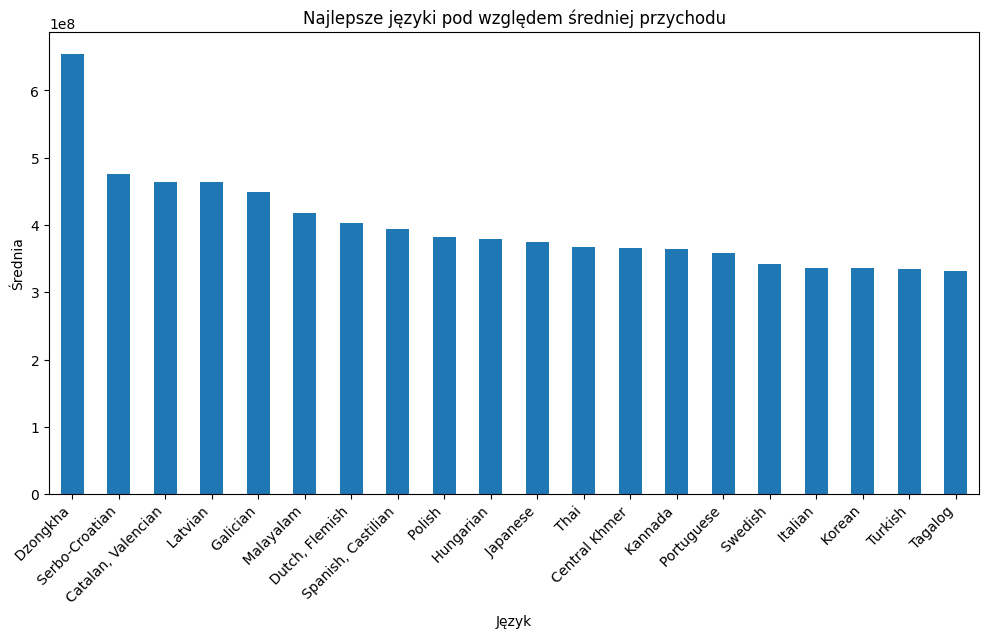

In [128]:
avgRevenueByLanguage = dataFrame.groupby('orig_lang')['revenue'].mean()

sortedAvgRevenue = avgRevenueByLanguage.sort_values(ascending=False)

print("Średnia przychodu dla każdego języka:")
print(sortedAvgRevenue.head(20))

plt.figure(figsize=(12, 6))
sortedAvgRevenue.head(20).plot(kind='bar')

plt.title('Najlepsze języki pod względem średniej przychodu')
plt.xlabel('Język')
plt.ylabel('Średnia')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Wiemy już że filmy w języku angielskim nie zawsze są takie najlepsze. Ma on najlepsze pozytywne odchylenie zysku, ale oprócz tego ma również wiele kiepskich filmów.

#### Przejdźmy do oceny filmów. Zadajmy sobie pytanie czy filmy nowsze są lepiej oceniane? Zakładam że jakość filmów z roku na rok rośnie i chciałbym to sprawdzić.

#### Podzielę dane na filmy nowsze i starsze. W nowszych będą filmy które były później niż rok 2018. Reszta będzie w starszych.
#### Chciałbym w tym przypadku użyć testu T studenta:
#### Hipoteza zerowa (H0): Średnie oceny filmów nie różnią się między grupami (nowsze i starsze).
#### Hipoteza alternatywna (H1): Średnie oceny filmów są istotnie różne między grupami.

In [154]:
starszeFilmy = dataFrame[dataFrame['rok'] <= 2000]['score']
nowszeFilmy = dataFrame[dataFrame['rok'] > 2000]['score']

tStatistic, pValue = ttest_ind(starszeFilmy, nowszeFilmy)

print(f'Test Statistic: {tStatistic}')
print(f'P-value: {pValue}')

alpha = 0.05
if pValue < alpha:
    print("Odrzucamy hipotezę zerową. Istnieje istotna różnica w ocenach między starszymi a nowszymi filmami.")
else:
    print("Nie ma istotnej różnicy w ocenach między starszymi a nowszymi filmami.")

Test Statistic: 8.50399087862706
P-value: 2.089047679871826e-17
Odrzucamy hipotezę zerową. Istnieje istotna różnica w ocenach między starszymi a nowszymi filmami.


#### Skoro wiemy że jest istotna różnica to teraz sprawdźmy jak to wygląda dla wszystkich lat.

In [171]:
print(f"Średnia starych filmów {starszeFilmy.mean()}")
print(f"Średnia nowych filmów {nowszeFilmy.mean()}")
print(f"Mediana starych filmów {starszeFilmy.median()}")
print(f"Mediana nowych filmów {nowszeFilmy.median()}")

Średnia starych filmów 65.54632721202003
Średnia nowych filmów 62.86610125931637
Mediana starych filmów 67.0
Mediana nowych filmów 65.0


#### Według testu, mamy istotną różnicę w ocenach między starszymi a nowszymi filmami. Średnie pokazują tylko lekką zmianę.

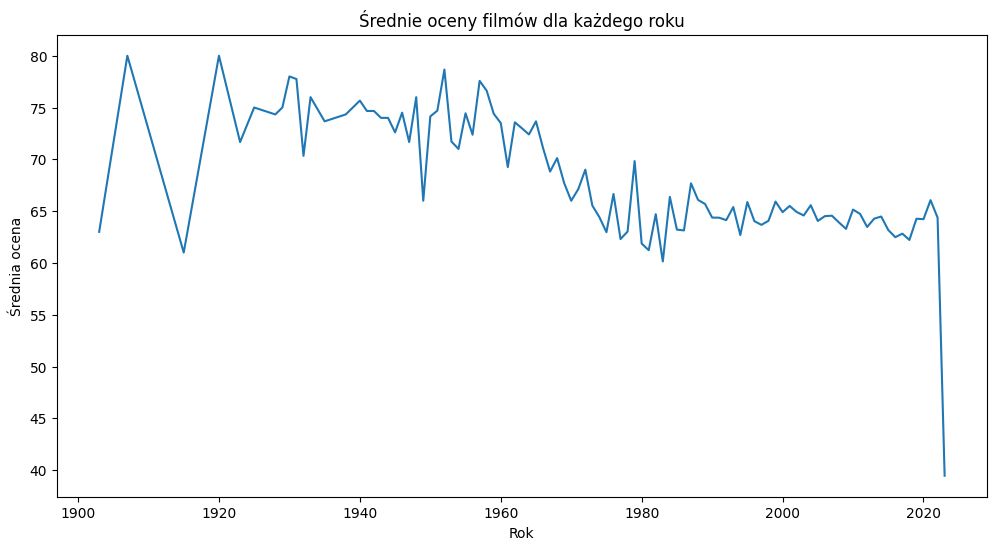

In [164]:
srednieOceny = dataFrame.groupby('rok')['score'].mean()

plt.figure(figsize=(12, 6))
plt.plot(srednieOceny.index, srednieOceny, linestyle='-')
plt.title('Średnie oceny filmów dla każdego roku')
plt.xlabel('Rok')
plt.ylabel('Średnia ocena')
plt.show()

#### Bardzo mocno się pomyliłem, bo widać mamy tutaj ogromny spadek, aczkolwiek podejrzewam że może to wynikać z powodu że starsze filmy były mniej oglądane i co za tym idzie mniej oceniane. Nie sprawdzimy tego jednak bo nie ma do tego danych.

In [174]:
iloscFilmow2023 = dataFrame[dataFrame['rok'] == 2023].shape[0]
print(f'Ilość filmów w 2023 roku: {iloscFilmow2023}')
iloscFilmow2022 = dataFrame[dataFrame['rok'] == 2022].shape[0]
print(f'Ilość filmów w 2022 roku: {iloscFilmow2022}')

Ilość filmów w 2023 roku: 403
Ilość filmów w 2022 roku: 954


#### Co ciekawe ocena w 2023 jest bardzo niska nawet ze sporą ilością filmów. Podejrzewałem że może to wynikać z małej ilości danych, jednak się myliłem. Chciałem tylko zobaczyć czy tylko oceny w 2023 roku są mierne i zobaczyć zysk dla tego roku.

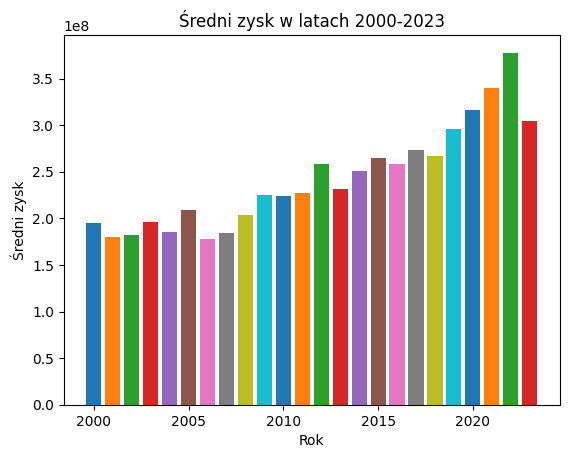

In [179]:
lata = range(2000, 2024)

for rok in lata:
    dane_rok = dataFrame[dataFrame['rok'] == rok]
    
    sredni_zysk = dane_rok['revenue'].mean()
    

    plt.bar(rok, sredni_zysk)

plt.xlabel('Rok')
plt.ylabel('Średni zysk')
plt.title('Średni zysk w latach 2000-2023')
plt.show()

#### Widzimy tutaj że faktycznie rok 2023 jest gorzej od lat 2020-2022, ale nie aż tak gorzej jak na wykresie ocen. Nie mam pomysłu z czego może wynikać taki spadek ocen w 2023 roku.

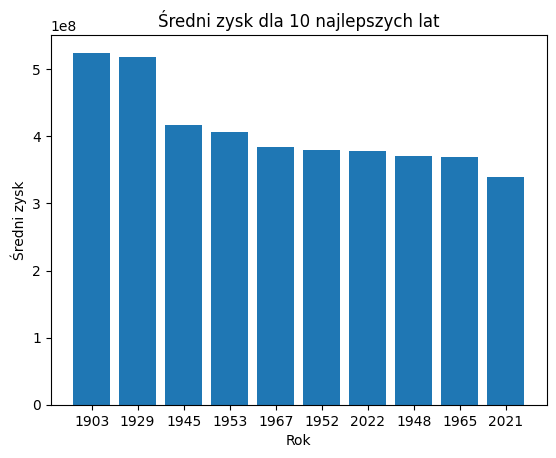

In [186]:
dataFrameRok = dataFrame
dataFrameRok['rok'] = dataFrame['rok'].astype(str)

srednieZyskiRok = dataFrameRok.groupby('rok')['revenue'].mean()

top10Lata = srednieZyskiRok.nlargest(10).index

plt.bar(srednieZyskiRok.loc[top10Lata].index, srednieZyskiRok.loc[top10Lata])
plt.xlabel('Rok')
plt.ylabel('Średni zysk')
plt.title('Średni zysk dla 10 najlepszych lat')
plt.show()

#### Mamy tutaj średni zysk dla 10 najlepszych lat. Ale przecież może on wynikać z ilości filmów. Teraz jest ich więcej, są dobre ale jest też dużo słabych które zaniżają średnią. Sprawdźmy to.

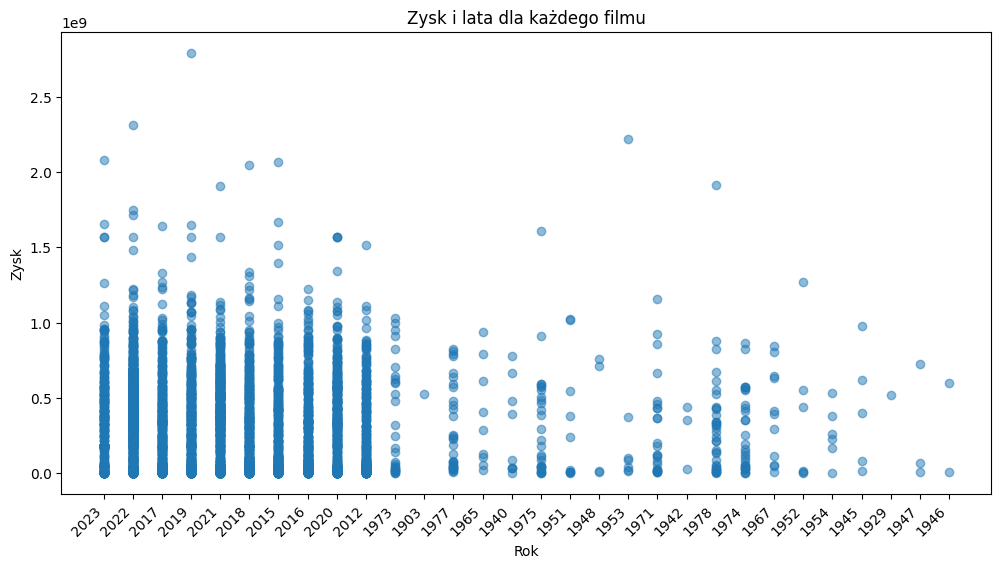

In [191]:
revenueByYear = dataFrame.groupby('rok')['revenue'].mean()

sortedRevenueByYear = revenueByYear.sort_values(ascending=False)
topYearsByRevenue = sortedRevenueByYear.head(30).index

dataFrameFiltered = dataFrame[dataFrame['rok'].isin(topYearsByRevenue)]

plt.figure(figsize=(12, 6))
plt.scatter(dataFrameFiltered['rok'], dataFrameFiltered['revenue'], alpha=0.5)

plt.xlabel('Rok')
plt.ylabel('Zysk')
plt.title('Zysk i lata dla każdego filmu')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Tutaj widzimy że rok 1903 wygrywa w średniej, ale ma zaledwie jeden film 